<a href="https://colab.research.google.com/github/Ricardoarias1/Coursera_DS/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stori Data Science Challenge

In [ ]:
# Connection to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Accessing to the Folder path**

In [ ]:
cd /content/drive/MyDrive/Data_Analyst_Jr

/content/drive/MyDrive/Data_Analyst_Jr


**Visualizing content of the Folder**

In [ ]:
ls

df.csv  Stori_DS_Challenge_2021.pdf


In [ ]:
# Importing the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Loading loading the fake credit card dataset
df = pd.read_csv("df.csv")

In [ ]:
df.head()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
df = df.drop("Unnamed: 0",axis=1)

### Frecuency Tables

In [ ]:
df.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

In [ ]:
df1 = df
df1.dtypes

cust_id                              object
activated_date                       object
last_payment_date                    object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
fraud                                 int64
dtype: object

In [ ]:
df1['activated_date']= pd.to_datetime(df1['activated_date'].dropna())
df1['last_payment_date']= pd.to_datetime(df1['last_payment_date'].dropna())
df1.dtypes

cust_id                                     object
activated_date                      datetime64[ns]
last_payment_date                   datetime64[ns]
balance                                    float64
balance_frequency                          float64
purchases                                  float64
oneoff_purchases                           float64
installments_purchases                     float64
cash_advance                               float64
purchases_frequency                        float64
oneoff_purchases_frequency                 float64
purchases_installments_frequency           float64
cash_advance_frequency                     float64
cash_advance_trx                             int64
purchases_trx                                int64
credit_limit                               float64
payments                                   float64
minimum_payments                           float64
prc_full_payment                           float64
tenure                         

**Question 1**

1.1 Plot an histogram of the balance amount for all the customers.  
1.2 Report any structure you find and any hypotheses you have about that structure.  
1.3 Report mean and median balance, grouped by year and month of ​activated_date​.

**1.1 Histogram of the balance amount for all the customers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance Amount')

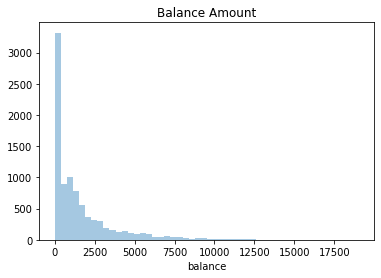

In [ ]:
sns.distplot(df1['balance'].dropna(),  kde = False).set_title("Balance Amount")

**1.2 Hypothesis**

The distribution of the Balance amount is unimodal and skewed right with the most data between 1000 and 2000, a range roughly of 17500, and outliers are present on the higher end.

**1.3 Numerical Summaries**

In [ ]:
year_month = df1.activated_date.dt.to_period("M").dropna()
df2=df1.groupby(year_month)

In [ ]:
df3=df2.balance.describe()
df3

,count,mean,std,min,25%,50%,75%,max
activated_date,,,,,,,,
2019-10,809.0,2482.234166,2859.577661,0.0,336.799916,1524.409377,3605.714046,19043.138560
2019-11,954.0,1848.704323,2223.193971,0.0,192.419354,1082.071173,2699.798738,14581.459140
2019-12,866.0,2018.788906,2377.115065,0.0,247.943044,1162.588384,2813.362377,15532.339720
2020-01,887.0,1854.535889,2156.129326,0.0,226.579147,1175.749847,2494.143161,12323.845360
2020-02,860.0,1747.350977,2189.665166,0.0,186.080861,994.841733,2517.527947,18495.558550
2020-03,928.0,1554.973023,2085.847658,0.0,115.820369,828.954823,2003.181650,16115.596400
2020-04,882.0,1483.183191,1864.687815,0.0,182.342490,910.141912,1992.145746,16304.889250
2020-05,932.0,1214.333732,1619.836202,0.0,81.822519,734.557681,1615.307507,16259.448570
2020-06,874.0,939.997996,1339.875550,0.0,68.766102,472.791862,1276.442120,13318.659120


In [ ]:
df3["median"] = df2.balance.median()
df3

,count,mean,std,min,25%,50%,75%,max,median
activated_date,,,,,,,,,
2019-10,809.0,2482.234166,2859.577661,0.0,336.799916,1524.409377,3605.714046,19043.138560,1524.409377
2019-11,954.0,1848.704323,2223.193971,0.0,192.419354,1082.071173,2699.798738,14581.459140,1082.071173
2019-12,866.0,2018.788906,2377.115065,0.0,247.943044,1162.588384,2813.362377,15532.339720,1162.588384
2020-01,887.0,1854.535889,2156.129326,0.0,226.579147,1175.749847,2494.143161,12323.845360,1175.749847
2020-02,860.0,1747.350977,2189.665166,0.0,186.080861,994.841733,2517.527947,18495.558550,994.841733
2020-03,928.0,1554.973023,2085.847658,0.0,115.820369,828.954823,2003.181650,16115.596400,828.954823
2020-04,882.0,1483.183191,1864.687815,0.0,182.342490,910.141912,1992.145746,16304.889250,910.141912
2020-05,932.0,1214.333732,1619.836202,0.0,81.822519,734.557681,1615.307507,16259.448570,734.557681
2020-06,874.0,939.997996,1339.875550,0.0,68.766102,472.791862,1276.442120,13318.659120,472.791862


**Question 2**

2.1   Report in a table the following information for customers who activated their account and made their last payment during 2020:  ​cust_id (excluding letters), ​activated_date (in format YYYY-MM), ​last_payment_date (in format YYYY-MM-DD, cash_advance​, ​credit_limit​, and a calculated field of ​cash_advance​ as a percentage of ​credit_limit.

In [ ]:
df_q2=df1[["cust_id", "activated_date", "last_payment_date", "cash_advance", 
     "credit_limit"]]

In [ ]:
df_q2.loc[:,"cust_id"]=df_q2.loc[:,"cust_id"].str.replace(r'\D', '').astype(int)
df_q2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,cust_id,activated_date,last_payment_date,cash_advance,credit_limit
0,10001,2019-10-06,2020-09-09,0.000000,1000.0
1,10002,2019-10-06,2020-07-04,6442.945483,7000.0
2,10003,2019-10-06,2020-09-17,0.000000,7500.0
3,10004,2019-10-06,2020-08-24,205.788017,7500.0
4,10005,2019-10-06,2020-10-20,0.000000,1200.0
...,...,...,...,...,...
8945,19186,2020-07-31,2020-11-03,0.000000,1000.0
8946,19187,2020-07-31,2020-09-06,0.000000,1000.0
8947,19188,2020-07-31,2020-06-03,0.000000,1000.0
8948,19189,2020-07-31,2020-07-19,36.558778,500.0


In [ ]:
df_q2.loc[:,"activated_date"]=df_q2.activated_date.dt.to_period("M")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_q2.loc[:,"last_payment_date"]=df_q2.last_payment_date.dt.to_period("D")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_q2.dtypes

cust_id                  int64
activated_date       period[M]
last_payment_date    period[D]
cash_advance           float64
credit_limit           float64
dtype: object

In [ ]:
df_q2["percentage"] = (df_q2['cash_advance'] / df_q2['credit_limit']) * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_q2

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percentage
0,10001,2019-10,2020-09-09,0.000000,1000.0,0.000000
1,10002,2019-10,2020-07-04,6442.945483,7000.0,92.042078
2,10003,2019-10,2020-09-17,0.000000,7500.0,0.000000
3,10004,2019-10,2020-08-24,205.788017,7500.0,2.743840
4,10005,2019-10,2020-10-20,0.000000,1200.0,0.000000
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,19189,2020-07,2020-07-19,36.558778,500.0,7.311756


**Question 3**

3.1   Build a predictive model for fraud.                                                                       

3.2   What explanatory variable was the most powerful predictor for fraud?




